In [41]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz


In [42]:
raw_data = pd.read_csv('/Users/arvindpawar/Desktop/Fifth Quarter/Capstone/Data/StartupFile_USA_Final.csv')

In [43]:
raw_data.head()

,startupName,homepage_url,category_list,total_funding,status,country_code,state_code,funding_rounds,first_funding_at,last_funding_at,homepage_url_code,time_delayFor_first_round,average_time_delay_rounds,average_raised_usd,average_time_delay_rounds_number,time_delayFor_first_round_number,statusCode,No_Of_Investors,MainCategory,USA_Region
0,One Inc.,http://whatis1.com,mobile,1150050.0,operating,USA,CA,3,7/20/11,2/5/14,1,566 days 00:00:00.000000000,465 days 12:00:00.000000000,575025.0,465,566,1,12,mobile,West
1,10-20 Media,http://www.10-20media.com,e-commerce,2050000.0,operating,USA,MD,4,6/18/09,12/28/11,1,285 days 00:00:00.000000000,307 days 16:00:00.000000000,512500.0,307,285,0,1,e-commerce,South
2,Redox,http://www.redoxengine.com,health care|health care information technology...,4000000.0,operating,USA,WI,2,11/26/14,10/20/15,1,328 days 00:00:00.000000000,328 days 00:00:00.000000000,2000000.0,328,328,1,6,healthcare,Midwest
3,10sec,https://10s.ec/,e-commerce|mobile commerce|social commerce,1600000.0,operating,USA,CA,2,10/31/13,5/8/14,1,189 days 00:00:00.000000000,189 days 00:00:00.000000000,1600000.0,189,189,1,2,mobile,West
4,10X Technologies,http://10xtechnologies.com,biotechnology,3550000.0,operating,USA,CA,2,11/7/12,1/12/15,1,796 days 00:00:00.000000000,796 days 00:00:00.000000000,1775000.0,796,796,1,1,biotech,West


In [44]:
print(f"The dataset contains {len(raw_data)} observations")

The dataset contains 9623 observations


In [45]:
raw_data.shape

(9623, 20)

In [46]:
raw_data.isna().sum()

startupName                           0
homepage_url                        235
category_list                         0
total_funding                         0
status                                0
country_code                          0
state_code                            0
funding_rounds                        0
first_funding_at                      0
last_funding_at                       0
homepage_url_code                     0
time_delayFor_first_round             0
average_time_delay_rounds             0
average_raised_usd                    0
average_time_delay_rounds_number      0
time_delayFor_first_round_number      0
statusCode                            0
No_Of_Investors                       0
MainCategory                          0
USA_Region                            0
dtype: int64

In [47]:
raw_data[raw_data.homepage_url.isna()]

,startupName,homepage_url,category_list,total_funding,status,country_code,state_code,funding_rounds,first_funding_at,last_funding_at,homepage_url_code,time_delayFor_first_round,average_time_delay_rounds,average_raised_usd,average_time_delay_rounds_number,time_delayFor_first_round_number,statusCode,No_Of_Investors,MainCategory,USA_Region
64,7mb Technologies,NaN,software,1017470.0,operating,USA,WA,3,10/28/13,8/14/15,0,266 days 00:00:00.000000000,327 days 12:00:00.000000000,3.391567e+05,327,266,1,1,software,West
101,Accelerated Pharma,NaN,pharmaceuticals,2549999.0,operating,USA,IL,2,6/4/15,11/23/15,0,172 days 00:00:00.000000000,172 days 00:00:00.000000000,1.275000e+06,172,172,1,1,pharma,Midwest
110,Accept Software,NaN,career management|software,25305000.0,acquired,USA,CA,4,9/16/05,12/14/10,0,314 days 00:00:00.000000000,638 days 08:00:00.000000000,6.326250e+06,638,314,1,3,software,West
227,ADVANCE Medical,NaN,health care,26000000.0,operating,USA,CA,2,5/31/11,9/4/13,0,827 days 00:00:00.000000000,827 days 00:00:00.000000000,1.300000e+07,827,827,1,3,healthcare,West
245,Advanced System Designs,NaN,software,1325000.0,operating,USA,IL,2,6/9/09,8/17/10,0,434 days 00:00:00.000000000,434 days 00:00:00.000000000,6.625000e+05,434,434,0,1,software,Midwest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9221,Waterford Battery Systems,NaN,batteries|electrical distribution|manufacturing,1594130.0,operating,USA,FL,2,3/17/14,7/15/15,0,485 days 00:00:00.000000000,485 days 00:00:00.000000000,7.970650e+05,485,485,1,1,manufacturing,South
9304,Whi,NaN,health and wellness|health care|medical,11317850.0,operating,USA,CA,2,4/2/14,4/13/15,0,376 days 00:00:00.000000000,376 days 00:00:00.000000000,5.658925e+06,376,376,1,1,pharma,West
9335,Windtronics,NaN,hardware + software,4000000.0,operating,USA,MI,2,4/1/09,1/12/10,0,286 days 00:00:00.000000000,286 days 00:00:00.000000000,2.000000e+06,286,286,0,1,software,Midwest
9421,XenSource,NaN,software,38000000.0,operating,USA,CA,3,1/13/05,10/31/06,0,231 days 00:00:00.000000000,328 days 00:00:00.000000000,1.266667e+07,328,231,1,6,software,West


In [48]:
#homepage_url_new mark 0 if no url else mark 1
raw_data['homepage_url_new'] = np.where(raw_data.homepage_url.isna(), 0, 1)

In [49]:
raw_data.head()

,startupName,homepage_url,category_list,total_funding,status,country_code,state_code,funding_rounds,first_funding_at,last_funding_at,...,time_delayFor_first_round,average_time_delay_rounds,average_raised_usd,average_time_delay_rounds_number,time_delayFor_first_round_number,statusCode,No_Of_Investors,MainCategory,USA_Region,homepage_url_new
0,One Inc.,http://whatis1.com,mobile,1150050.0,operating,USA,CA,3,7/20/11,2/5/14,...,566 days 00:00:00.000000000,465 days 12:00:00.000000000,575025.0,465,566,1,12,mobile,West,1
1,10-20 Media,http://www.10-20media.com,e-commerce,2050000.0,operating,USA,MD,4,6/18/09,12/28/11,...,285 days 00:00:00.000000000,307 days 16:00:00.000000000,512500.0,307,285,0,1,e-commerce,South,1
2,Redox,http://www.redoxengine.com,health care|health care information technology...,4000000.0,operating,USA,WI,2,11/26/14,10/20/15,...,328 days 00:00:00.000000000,328 days 00:00:00.000000000,2000000.0,328,328,1,6,healthcare,Midwest,1
3,10sec,https://10s.ec/,e-commerce|mobile commerce|social commerce,1600000.0,operating,USA,CA,2,10/31/13,5/8/14,...,189 days 00:00:00.000000000,189 days 00:00:00.000000000,1600000.0,189,189,1,2,mobile,West,1
4,10X Technologies,http://10xtechnologies.com,biotechnology,3550000.0,operating,USA,CA,2,11/7/12,1/12/15,...,796 days 00:00:00.000000000,796 days 00:00:00.000000000,1775000.0,796,796,1,1,biotech,West,1


In [50]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9623 entries, 0 to 9622
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   startupName                       9623 non-null   object 
 1   homepage_url                      9388 non-null   object 
 2   category_list                     9623 non-null   object 
 3   total_funding                     9623 non-null   float64
 4   status                            9623 non-null   object 
 5   country_code                      9623 non-null   object 
 6   state_code                        9623 non-null   object 
 7   funding_rounds                    9623 non-null   int64  
 8   first_funding_at                  9623 non-null   object 
 9   last_funding_at                   9623 non-null   object 
 10  homepage_url_code                 9623 non-null   int64  
 11  time_delayFor_first_round         9623 non-null   object 
 12  averag

In [51]:
#converting to datetime
raw_data.first_funding_at = pd.to_datetime(raw_data.first_funding_at)
raw_data.last_funding_at  = pd.to_datetime(raw_data.last_funding_at )


#calculating the number of days
raw_data['TimeBetweenFirstLast']=(raw_data.last_funding_at - raw_data.first_funding_at).astype('timedelta64[D]')



In [52]:
raw_data.head()

,startupName,homepage_url,category_list,total_funding,status,country_code,state_code,funding_rounds,first_funding_at,last_funding_at,...,average_time_delay_rounds,average_raised_usd,average_time_delay_rounds_number,time_delayFor_first_round_number,statusCode,No_Of_Investors,MainCategory,USA_Region,homepage_url_new,TimeBetweenFirstLast
0,One Inc.,http://whatis1.com,mobile,1150050.0,operating,USA,CA,3,2011-07-20,2014-02-05,...,465 days 12:00:00.000000000,575025.0,465,566,1,12,mobile,West,1,931.0
1,10-20 Media,http://www.10-20media.com,e-commerce,2050000.0,operating,USA,MD,4,2009-06-18,2011-12-28,...,307 days 16:00:00.000000000,512500.0,307,285,0,1,e-commerce,South,1,923.0
2,Redox,http://www.redoxengine.com,health care|health care information technology...,4000000.0,operating,USA,WI,2,2014-11-26,2015-10-20,...,328 days 00:00:00.000000000,2000000.0,328,328,1,6,healthcare,Midwest,1,328.0
3,10sec,https://10s.ec/,e-commerce|mobile commerce|social commerce,1600000.0,operating,USA,CA,2,2013-10-31,2014-05-08,...,189 days 00:00:00.000000000,1600000.0,189,189,1,2,mobile,West,1,189.0
4,10X Technologies,http://10xtechnologies.com,biotechnology,3550000.0,operating,USA,CA,2,2012-11-07,2015-01-12,...,796 days 00:00:00.000000000,1775000.0,796,796,1,1,biotech,West,1,796.0


In [53]:
#Label encoding main category list
raw_data = raw_data.astype({"MainCategory":'category'})
raw_data["category_code"] = raw_data["MainCategory"].cat.codes
raw_data.head(20)

,startupName,homepage_url,category_list,total_funding,status,country_code,state_code,funding_rounds,first_funding_at,last_funding_at,...,average_raised_usd,average_time_delay_rounds_number,time_delayFor_first_round_number,statusCode,No_Of_Investors,MainCategory,USA_Region,homepage_url_new,TimeBetweenFirstLast,category_code
0,One Inc.,http://whatis1.com,mobile,1150050.0,operating,USA,CA,3,2011-07-20,2014-02-05,...,5.750250e+05,465,566,1,12,mobile,West,1,931.0,6
1,10-20 Media,http://www.10-20media.com,e-commerce,2050000.0,operating,USA,MD,4,2009-06-18,2011-12-28,...,5.125000e+05,307,285,0,1,e-commerce,South,1,923.0,1
2,Redox,http://www.redoxengine.com,health care|health care information technology...,4000000.0,operating,USA,WI,2,2014-11-26,2015-10-20,...,2.000000e+06,328,328,1,6,healthcare,Midwest,1,328.0,3
3,10sec,https://10s.ec/,e-commerce|mobile commerce|social commerce,1600000.0,operating,USA,CA,2,2013-10-31,2014-05-08,...,1.600000e+06,189,189,1,2,mobile,West,1,189.0,6
4,10X Technologies,http://10xtechnologies.com,biotechnology,3550000.0,operating,USA,CA,2,2012-11-07,2015-01-12,...,1.775000e+06,796,796,1,1,biotech,West,1,796.0,0
5,121nexus,http://www.121nexus.com,health diagnostics|medical devices|personaliza...,794000.0,operating,USA,RI,6,2012-02-06,2014-01-01,...,1.323333e+05,139,74,1,6,medicalGear,Northeast,1,695.0,5
6,1366 Technologies,http://www.1366tech.com,manufacturing,71450000.0,operating,USA,MA,9,2008-03-27,2015-04-09,...,7.938889e+06,321,678,1,9,manufacturing,Northeast,1,2569.0,4
7,15Five,http://15five.com,software,3400000.0,operating,USA,CA,3,2012-01-01,2014-10-02,...,1.133333e+06,502,380,1,14,software,West,1,1005.0,8
8,1DocWay,http://1docway.com,doctors|health care|health care information te...,1700000.0,acquired,USA,NY,2,2011-08-10,2015-07-21,...,1.700000e+06,1441,1441,1,12,healthcare,Northeast,1,1441.0,3
9,Babyscripts,http://www.getbabyscripts.com,health and wellness|mobile health,2100000.0,operating,USA,DC,3,2013-03-11,2015-04-10,...,7.000000e+05,380,287,1,4,healthcare,South,1,760.0,3


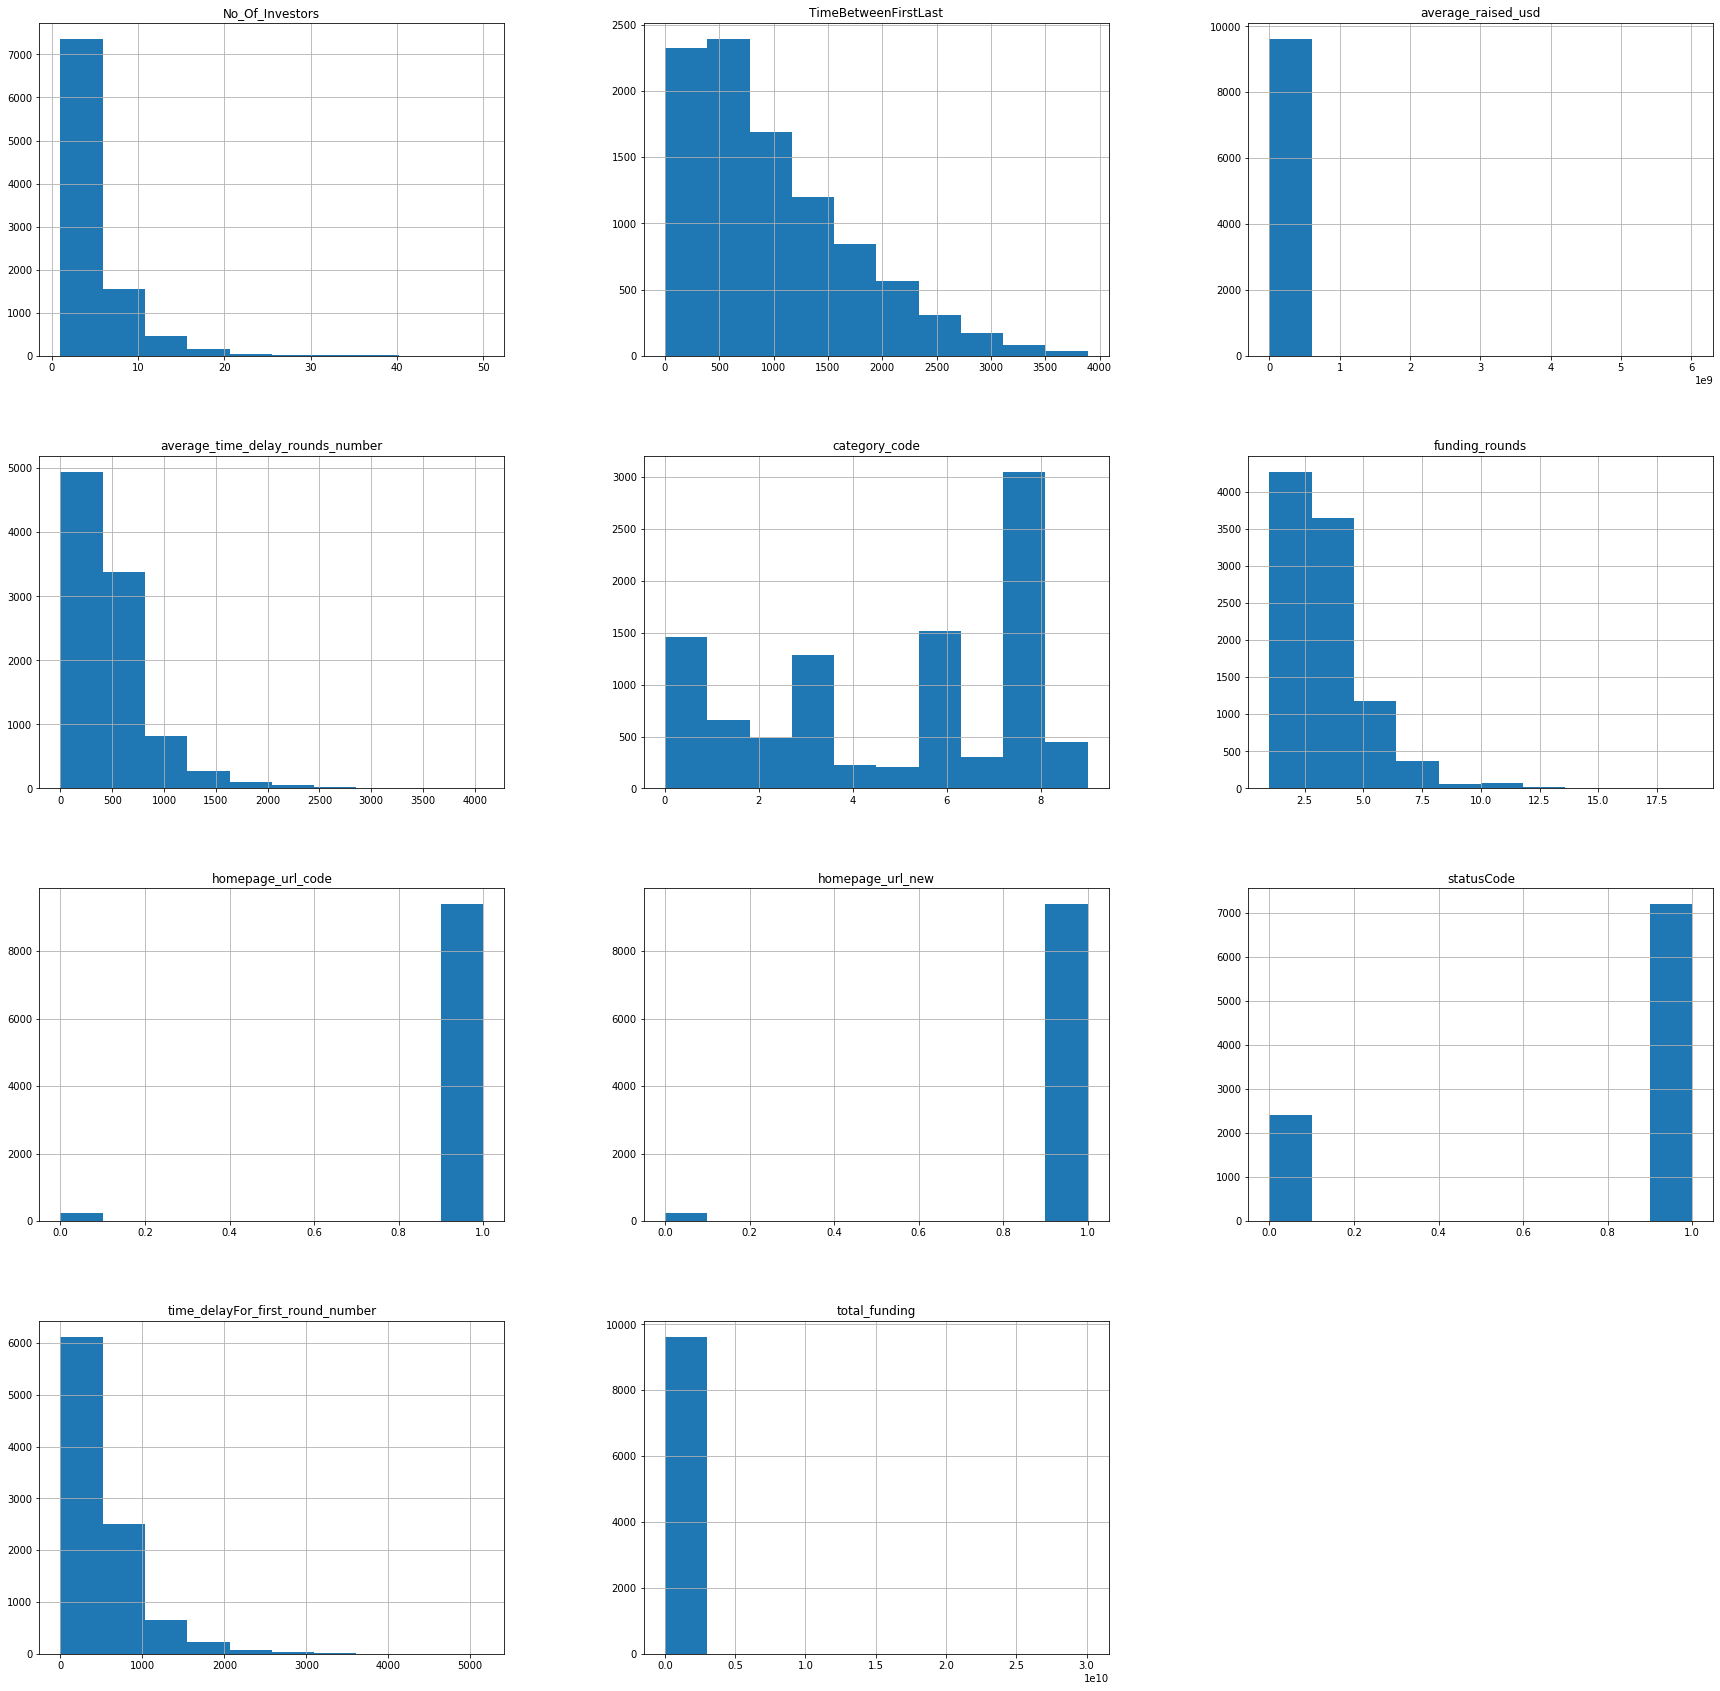

In [54]:
# Plotting the distribution of numerical and boolean categories
raw_data.hist(figsize=(30,30));

In [55]:
raw_data.head()

,startupName,homepage_url,category_list,total_funding,status,country_code,state_code,funding_rounds,first_funding_at,last_funding_at,...,average_raised_usd,average_time_delay_rounds_number,time_delayFor_first_round_number,statusCode,No_Of_Investors,MainCategory,USA_Region,homepage_url_new,TimeBetweenFirstLast,category_code
0,One Inc.,http://whatis1.com,mobile,1150050.0,operating,USA,CA,3,2011-07-20,2014-02-05,...,575025.0,465,566,1,12,mobile,West,1,931.0,6
1,10-20 Media,http://www.10-20media.com,e-commerce,2050000.0,operating,USA,MD,4,2009-06-18,2011-12-28,...,512500.0,307,285,0,1,e-commerce,South,1,923.0,1
2,Redox,http://www.redoxengine.com,health care|health care information technology...,4000000.0,operating,USA,WI,2,2014-11-26,2015-10-20,...,2000000.0,328,328,1,6,healthcare,Midwest,1,328.0,3
3,10sec,https://10s.ec/,e-commerce|mobile commerce|social commerce,1600000.0,operating,USA,CA,2,2013-10-31,2014-05-08,...,1600000.0,189,189,1,2,mobile,West,1,189.0,6
4,10X Technologies,http://10xtechnologies.com,biotechnology,3550000.0,operating,USA,CA,2,2012-11-07,2015-01-12,...,1775000.0,796,796,1,1,biotech,West,1,796.0,0


In [56]:
#Label encoding USA region 
raw_data = raw_data.astype({"USA_Region":'category'})
raw_data["USARegion_code"] = raw_data["USA_Region"].cat.codes
raw_data.head()

,startupName,homepage_url,category_list,total_funding,status,country_code,state_code,funding_rounds,first_funding_at,last_funding_at,...,average_time_delay_rounds_number,time_delayFor_first_round_number,statusCode,No_Of_Investors,MainCategory,USA_Region,homepage_url_new,TimeBetweenFirstLast,category_code,USARegion_code
0,One Inc.,http://whatis1.com,mobile,1150050.0,operating,USA,CA,3,2011-07-20,2014-02-05,...,465,566,1,12,mobile,West,1,931.0,6,3
1,10-20 Media,http://www.10-20media.com,e-commerce,2050000.0,operating,USA,MD,4,2009-06-18,2011-12-28,...,307,285,0,1,e-commerce,South,1,923.0,1,2
2,Redox,http://www.redoxengine.com,health care|health care information technology...,4000000.0,operating,USA,WI,2,2014-11-26,2015-10-20,...,328,328,1,6,healthcare,Midwest,1,328.0,3,0
3,10sec,https://10s.ec/,e-commerce|mobile commerce|social commerce,1600000.0,operating,USA,CA,2,2013-10-31,2014-05-08,...,189,189,1,2,mobile,West,1,189.0,6,3
4,10X Technologies,http://10xtechnologies.com,biotechnology,3550000.0,operating,USA,CA,2,2012-11-07,2015-01-12,...,796,796,1,1,biotech,West,1,796.0,0,3


In [57]:
cleandf = raw_data.drop(columns = ['startupName','homepage_url','category_list','status','country_code','time_delayFor_first_round',
                    'state_code','first_funding_at','last_funding_at','homepage_url_new','MainCategory','USA_Region',
                        'average_time_delay_rounds'])

In [58]:
cleandf.head()

,total_funding,funding_rounds,homepage_url_code,average_raised_usd,average_time_delay_rounds_number,time_delayFor_first_round_number,statusCode,No_Of_Investors,TimeBetweenFirstLast,category_code,USARegion_code
0,1150050.0,3,1,575025.0,465,566,1,12,931.0,6,3
1,2050000.0,4,1,512500.0,307,285,0,1,923.0,1,2
2,4000000.0,2,1,2000000.0,328,328,1,6,328.0,3,0
3,1600000.0,2,1,1600000.0,189,189,1,2,189.0,6,3
4,3550000.0,2,1,1775000.0,796,796,1,1,796.0,0,3


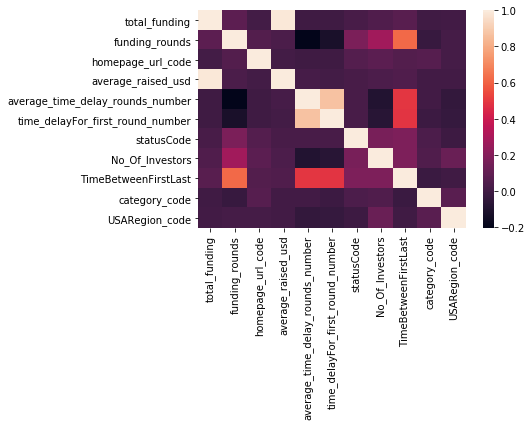

In [78]:
# Calculating the correlation matrix
corr = cleandf.corr()
# Generating a heatmap
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns)

#As it can be seen from the plot that the predictor variables do not show high multicolinearity

In [79]:
#split dataset in features and target variable

y = cleandf.statusCode # Target variable
x = cleandf[[ 'total_funding', 'funding_rounds','homepage_url_code','average_raised_usd','average_time_delay_rounds_number',
            'time_delayFor_first_round_number','No_Of_Investors','category_code','TimeBetweenFirstLast','USARegion_code']]

In [98]:
cleandf.statusCode.value_counts()

1    7204
0    2419
Name: statusCode, dtype: int64

In [102]:
from pprint import pprint
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [103]:
def split_downsample(X,Y):
    var= y.name
    #split data into test and training sets
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33)
    #combine them back for resampling
    train_data = pd.concat([X_train, y_train], axis=1)
    # separate minority and majority classes
    negative = train_data[train_data[var]==0]
    positive = train_data[train_data[var]==1]

    # downsample majority
    neg_downsampled = resample(negative,
        replace=True, # sample with replacement
        n_samples=len(positive), # match number in minority class
        ) # reproducible results
    
    
    # combine majority and upsampled minority
    upsampled = pd.concat([neg_downsampled, positive])
    # check new class counts
    
    new_X_train = upsampled.drop(var,axis=1)
    new_y_train = upsampled[var]
    
    return new_X_train, X_test, new_y_train, y_test

In [104]:
def downsample(X,y,rs=None):
    var= y.name
    
    joint = pd.concat([X, y], axis=1)
    negative = joint[joint[var]==0]
    positive = joint[joint[var]==1]

    # downsample majority
    neg_downsampled = resample(negative,
        replace=True, # sample with replacement
        n_samples=len(positive), # match number in minority class
        random_state = rs) # reproducible results
    
    
    # combine majority and upsampled minority
    upsampled = pd.concat([neg_downsampled, positive])
    # check new class counts
    
    new_X = upsampled.drop(var,axis=1)
    new_y = upsampled[var]
    
    return new_X, new_y

In [105]:
downsample(x, y)[1].value_counts()

1    7204
0    7204
Name: statusCode, dtype: int64

In [106]:
def downsample_split(X,y):
    var= y.name
    #combine them for resampling
    train_data = pd.concat([X, y], axis=1)
    # separate minority and majority classes
    negative = train_data[train_data[var]==0]
    positive = train_data[train_data[var]==1]

    # downsample majority
    neg_downsampled = resample(negative,
        replace=True, # sample with replacement
        n_samples=len(positive), # match number in minority class
        ) # reproducible results
    
    
    # combine majority and upsampled minority
    upsampled = pd.concat([neg_downsampled, positive])
    
    X_train, X_test, y_train, y_test = train_test_split( 
        upsampled.drop(var,axis=1), upsampled[var], stratify=upsampled[var],
        test_size=0.33,)
    
    # check new class counts
#     print(y_train.value_counts())

    return X_train, X_test, y_train, y_test

In [107]:
X_train, X_test, y_train, y_test = downsample_split(x,y)

In [108]:
# #splitting the dataset into train and test

# x_train , x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [114]:
#Scaling the independent variables

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [116]:
from imblearn.over_sampling import (RandomOverSampler)
sampler = RandomOverSampler(random_state=0)

X_rs, y_rs = sampler.fit_sample(X_train, y_train)

In [117]:
#Building the decision tree
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
classifier.fit(X_rs, y_rs)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [118]:
#make predictions on the test data
y_pred = classifier.predict(X_test)

In [119]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1494,  884],
       [ 837, 1540]])

In [120]:
# Accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6380651945320716


In [121]:
##Random Forest

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_rs, y_rs)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [126]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [127]:
# Making the Confusion Matrix
print("Random Forest", sep=('\n'))
print(pd.crosstab(y_test, y_pred, rownames=['Actual Observation'], colnames=['Predicted Observation']))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Random Forest
Predicted Observation     0     1
Actual Observation               
0                      2174   204
1                       648  1729
              precision    recall  f1-score   support

           0       0.77      0.91      0.84      2378
           1       0.89      0.73      0.80      2377

    accuracy                           0.82      4755
   macro avg       0.83      0.82      0.82      4755
weighted avg       0.83      0.82      0.82      4755


Accuracy: 0.820820189274448


In [128]:
##Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
model.fit(X_rs, y_rs)
y_pred=model.predict(X_test)


print("Gradient Boosting", sep=('\n'))
print(pd.crosstab(y_test, y_pred, rownames=['Actual Observation'], 
                  colnames=['Predicted Observation']))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Gradient Boosting
Predicted Observation     0     1
Actual Observation               
0                      1754   624
1                       891  1486
              precision    recall  f1-score   support

           0       0.66      0.74      0.70      2378
           1       0.70      0.63      0.66      2377

    accuracy                           0.68      4755
   macro avg       0.68      0.68      0.68      4755
weighted avg       0.68      0.68      0.68      4755


Accuracy: 0.6813880126182965


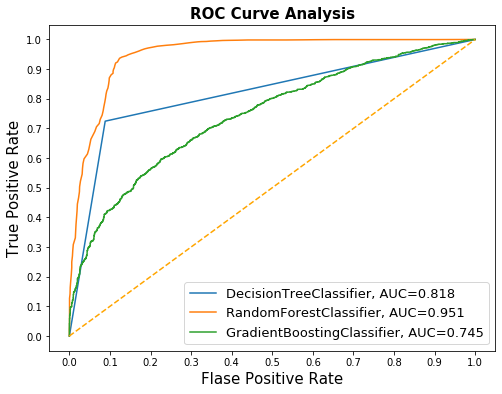

In [130]:
# Import the classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234),
              GradientBoostingClassifier(random_state=1234)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_rs, y_rs)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)


fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()